# projeto rede neural 
- 0: Primeiro vou defirnir minha função sigma
- 1: Fazer o algoritimo da descida do gradiente
- 2: Depois minha função que intera a descido do gradiente
- 3: Inicio minha rede, com funcoes custo e tudo
- 4: Crio a função que calcula o delta da ultima camada
- 6: Crio a função que calcula das outras camadas
- 7: Coloco tudo num ciclo de treino
- 8: Calculo as médias
- 9: Jogo na descida do gradiente
- 10: repito de 7 - 9
- 11: fazer grafico dinamico do custo e da precisão
- 12: rescrever em júlia

In [37]:
# bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
def sigma(z):
    return 1/(1 + np.exp(-z))
# w --> peso, grad_w --> grad de w, n --> relaxação
def grad_descend_2(w,jacob_C,grad_C_y,n):
    w =w - n * jacob_C.T @ grad_C_y
    return w

def grad_descend(w,grad_C,n):
    w = w - n * grad_C
    return w
# cost functions
def C (output,expected):
    cost = (expected - output)**2
    return np.mean(cost)
# z function
def z(sigma,w,x,b):
    return sigma(w @ x + b)

def delta_out(output,expected):
    return 2*(expected - output)*output * (1 - output)
 
#fazer por neuronio
# value e o valor obtido, delta_mais um e o delta de todos os neuronios da camada seguinta, w pessos em relação a camada seguite
def delta(delta_l_mais_1,w,value):
    delta_l_minos_1 = delta_l_mais_1 * w * ( value * (1-value) )
    return np.sum(delta_l_minos_1)



In [39]:
# newral check
class newral:
    
    def __init__(self,input_size):
        # inputs 
        self.h_l_size = 10
        h_l_size  = self.h_l_size
        self.input_size = input_size 
        output_size  = 10
        
        
        # criando os vetores intermediarios
        self.y1 = np.zeros(h_l_size)
        self.y2 = np.zeros(output_size)
        
        
        #-----------------------------#
        # input vector
        self.x = np.zeros(input_size)
        
        # hl vecotor
        self.hl_vctor = np.zeros(h_l_size)
        
        #outpu vector
        self.output_vector = np.zeros(output_size)
        
        # weight 1 # fazer a inicialização xavier
        self.w_0_1 = np.random.randn(h_l_size,input_size)  * np.sqrt(1.0/ self.input_size)
        
        # bias 1
        self.b_1 = np.random.randn(h_l_size) * np.sqrt(1.0/ h_l_size)
        
        # weight 2
        self.w_1_2 = np.random.randn(output_size,h_l_size) * np.sqrt(1.0/ h_l_size)
        
        # bias 2
        self.b_2 = np.random.randn(output_size) * np.sqrt(1.0/ output_size)



    def thinking(self,input_):
        
        # dou meu input
        self.x = input_
        
        # hl
        z1 = self.w_0_1 @ self.x + self.b_1
        self.y1 = sigma(z1)
        
        #output
        z2 = self.w_1_2 @ self.y1 + self.b_2
        self.y2 = sigma(z2)
        
        return self.y2


(60000, 785)

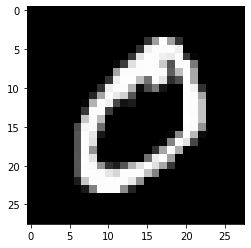

In [40]:
# Loading the images
train = np.array(pd.read_csv('archive/mnist_train.csv'))
train_tag = train[:,0]
train = train / 255.0
# a linhas tem o label e a imagem
plt.imshow(train[1,1:].reshape(28, 28),cmap = 'gray')

# veotor resultado
expected = np.zeros(10)
expected[train_tag[1]] = 1
np.shape(train)


In [10]:
rede1 = newral(784)
### ------ segurança ------ ###

In [33]:
# ciclo e treinameto da minha rede
# ---> iniciando minhas rede
n_inputs = 784
rede = newral(n_inputs)
size_delta_l_menos_1 = rede.h_l_size
dataset_len = 10
output_len = 10
x_input = np.zeros((dataset_len, n_inputs))
y2 = np.zeros((dataset_len,output_len))
y1 = np.zeros((dataset_len,rede.h_l_size))
expected = np.zeros((dataset_len, output_len))
n = 10
l = 0
i = 0


while l < 6000:
    # Deltas
    deltas_L1 = np.zeros((dataset_len,size_delta_l_menos_1))
    deltas_L2 = np.zeros((dataset_len,output_len))

    #Calculando os deltas de um dataset
    for i in range (dataset_len):
        # ---> guardando meu primeito output numa variavel, train é minha matriz com os valores e o label
        x_input[i,:] = train[i + l*dataset_len,1:]
        # o vetor esperado
        expected[i, train_tag[i + l*dataset_len]] = 1
        # minhas rede pensando
        y2[i,:] = rede.thinking(x_input[i,:])
        y1[i,:] = rede.y1

        #calculando a função custo
        #cost = C(y2[i,:] , expected[])

        # calculando o delta da primeira camanda
        deltas_L2[i,:] = delta_out(y2[i,:],expected[i,:])

        # calculando o delta da camada anterior
        size_w = np.size(rede.w_1_2[0,:])

    # calculo os meus deltas
    i = 0
    for i in range (dataset_len):
        for k in range(size_w):
            deltas_L1[i,k] = delta(deltas_L2[i,:],rede.w_1_2[:,k],y1[i,k])
    
        k = 0
    
    

    
    # ja tenho os deltas calculados tenho que calcular agora os valores dos gradientes, de todas as imagens
    gradient_w_1_2_x = np.zeros((output_len,rede.h_l_size,dataset_len))
    i = 0
    k = 0
    for i in range(dataset_len):
        for k in range(output_len):
            gradient_w_1_2_x[k,:,i] = deltas_L2[i,k] * y1[i,:]
        k = 0

    gradient_w_0_1_x = np.zeros((rede.h_l_size,rede.input_size,dataset_len))
    i = 0
    k = 0
    for i in range(dataset_len):
        for k in range(rede.h_l_size):
            gradient_w_0_1_x[k,:,i] = deltas_L1[i,k] * x_input[i,:]
        k = 0
        
    # calcular a media por interação agora
    gradient_w_1_2 = np.zeros((output_len,rede.h_l_size))
    gradient_w_0_1 = np.zeros((rede.h_l_size,rede.input_size))

    i = 0
    k = 0
    for i in range(output_len):
        for k in range(rede.h_l_size):
            gradient_w_1_2[i,k] = np.mean(gradient_w_1_2_x[i,k,:]) 
        k = 0
        
    i = 0
    k = 0
    for i in range(rede.h_l_size):
        for k in range(rede.input_size):
            gradient_w_0_1[i,k] = np.mean(gradient_w_0_1_x[i,k,:])
        k = 0

        
    # agora a medias das bias
    grad_bias_1 = np.zeros(rede.h_l_size)

    grad_bias_2 = np.zeros(output_len)

    i = 0
    for i in range(rede.h_l_size):
        grad_bias_1[i] = np.mean(deltas_L1[:,i]) 
    k = 0
    for k in range(output_len):
        grad_bias_2[k] = np.mean(deltas_L2[:,k])
# atualizando os gradientes(w,grad,n)

    rede.w_0_1 -= n*gradient_w_0_1
    rede.w_1_2 -= n*gradient_w_1_2
    rede.b_1 -= n*grad_bias_1
    rede.b_2 -= n*grad_bias_2
# atualizando o l
    l += 1

In [76]:
# ja tenho os deltas calculados tenho que calcular agora os valores dos gradientes, de todas as imagens
gradient_w_1_2_x = np.zeros((output_len,rede.h_l_size,dataset_len))
i = 0
k = 0
for i in range(dataset_len):
    for k in range(output_len):
        gradient_w_1_2_x[k,:,i] = deltas_L2[i,k] * rede.y1


gradient_w_0_1_x = np.zeros((rede.h_l_size,rede.input_size,dataset_len))
i = 0
k = 0
for i in range(dataset_len):
    for k in range(rede.h_l_size):
        gradient_w_0_1_x[k,:,i] = deltas_L1[i,k] * rede.x
        


In [ ]:
# calcular a media por interação agora
gradient_w_1_2 = np.zeros((output_len,rede.h_l_size))
gradient_w_0_1 = np.zeros((rede.h_l_size,rede.input_size))

i = 0
k = 0
for i in range(output_len):
    for k in range(rede.h_l_size):
        gradient_w_1_2[i,k] = np.mean(gradient_w_1_2_x[i,k,:]) 

i = 0
k = 0
for i in range(rede.h_l_size):
    for k in range(rede.input_size):
        gradient_w_0_1[i,k] = np.mean(gradient_w_0_1_x[i,k,:]) 
        
# agora a medias das bias
grad_bias_1 = np.zeros(rede.h_l_size)

grad_bias_2 = np.zeros(output_len)

i = 0
for i in range(rede.h_l_size):
    grad_bias_1[i] = np.mean(deltas_L1[:,i]) 
k = 0
for k in range(output_len):
    grad_bias_2[k] = np.mean(deltas_L2[:,k])
# atualizando os gradientes(w,grad,n)

grad_descend(rede.w_0_1,gradient_w_0_1,10)
grad_descend(rede.w_1_2,gradient_w_1_2,10)
grad_descend(rede.b_1,grad_bias_1,1)
grad_descend(rede.b_2,grad_bias_2,1)

In [6]:
test = np.array(pd.read_csv('archive/mnist_test.csv'))
# Loading the images
test = np.array(pd.read_csv('archive/mnist_test.csv'))
test_tag = train[:,0]


In [34]:
print(rede.thinking(train[1,1:]))
print(train_tag[1])
rede.w_0_1

[0.99975967 0.99869278 0.99962674 0.99966529 0.99997672 0.99953931
 0.9999891  0.99967471 0.99998925 0.99996405]
0


array([[ 0.0391193 ,  0.04195869,  0.01799161, ...,  0.02997195,
        -0.03311249,  0.00941895],
       [ 0.00255334, -0.02962597, -0.02603708, ..., -0.01673535,
        -0.03020327,  0.02446908],
       [ 0.0041884 , -0.0327013 ,  0.04095165, ...,  0.01307841,
        -0.03507031, -0.02894796],
       ...,
       [-0.01651856, -0.04201183, -0.02834375, ...,  0.02610503,
         0.00559841, -0.02349527],
       [-0.03193456, -0.0569549 , -0.04432506, ...,  0.0088695 ,
        -0.02438187,  0.00280873],
       [-0.05053373,  0.03684961, -0.03599257, ...,  0.02369122,
         0.04314577,  0.06254607]])

0
1
